<a href="https://colab.research.google.com/github/jermwatt/machine_learning_refined/blob/main/notes/2_Zero_order_methods/2_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 2: Zero order methods

#  Introduction

In [ ]:
# import standard libs
import os

# if on collab pull required subdirectories
if os.getenv("COLAB_RELEASE_TAG"): 
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone
    from pathlib import Path 

    # clone images
    if not Path('chapter_2_images').is_dir():
        !ghclone https://github.com/jermwatt/machine_learning_refined/tree/main/notes/2_Zero_order_methods/chapter_2_images
    else:
        print('chapter_2_images already cloned!')

# append path for local library, data, and image import
import sys
sys.path.append('./chapter_2_images') 

# image paths
image_path_1 = 'chapter_2_images/bigpicture_regression_optimization.png'
image_path_2 = 'chapter_2_images/bigpicture_classification_optimization.png'

# standard imports
from IPython.display import Image, HTML

%load_ext autoreload
%autoreload 2

# Introduction

The problem of determining the smallest (or largest) value a function can take, referred to as its *global minimum* (or *global maximum*), is a centuries old pursuit that has numerous applications throughout the sciences and engineering.  In this Chapter we begin our investigation of mathematical optimization by describing the *zero order optimization* techniques.  While not always the most powerful optimization tools at our disposal, zero order techniques are conceptually the simplest tools available to us - requiring the least amount of intellectual machinery and jargon to describe.  Because of this discussing zero order methods first allows us to lay bear, in a simple setting, a range of crucial concepts we will see throughout the Chapters that follow in more complex settings - including the notions of *optimality*, *local optimization*, *descent directions*, *steplengths*, and more.

## Visualizing minima and maxima

When a function takes in only one or two inputs we can attempt to visually identify its minima or maxima by plotting it over a large swath of its input space. While this idea certainly fails when a function takes in three or more inputs (since we can no longer visualize it properly), we begin nevertheless by first examining a number of low dimensional examples to gain an intuitive feel for how we might effectively identify these desired minima or maxima in general.

#### <span style="color:#a50e3e;">Example 1. </span> Visual inspection of simple functions for minima and maxima

Every machine learning problem has parameters that must be tuned properly to ensure optimal learning. For example, there are two parameters that must be properly tuned in the case of a simple linear regression, when fitting a line to a scatter of data: the slope and intercept of the linear model.

These two parameters are tuned by forming what is called a cost function or loss function. This is a continuous function in both parameters that measures how well the linear model fits a dataset given a value for its slope and intercept. The proper tuning of these parameters via the cost function corresponds geometrically to finding the values for the parameters that make the cost function as small as possible or, in other words, minimize the cost function. The image below illustrates how choosing a set of parameters higher on the cost function results in a corresponding line fit that is poorer than the one corresponding to parameters at the lowest point on the cost surface.


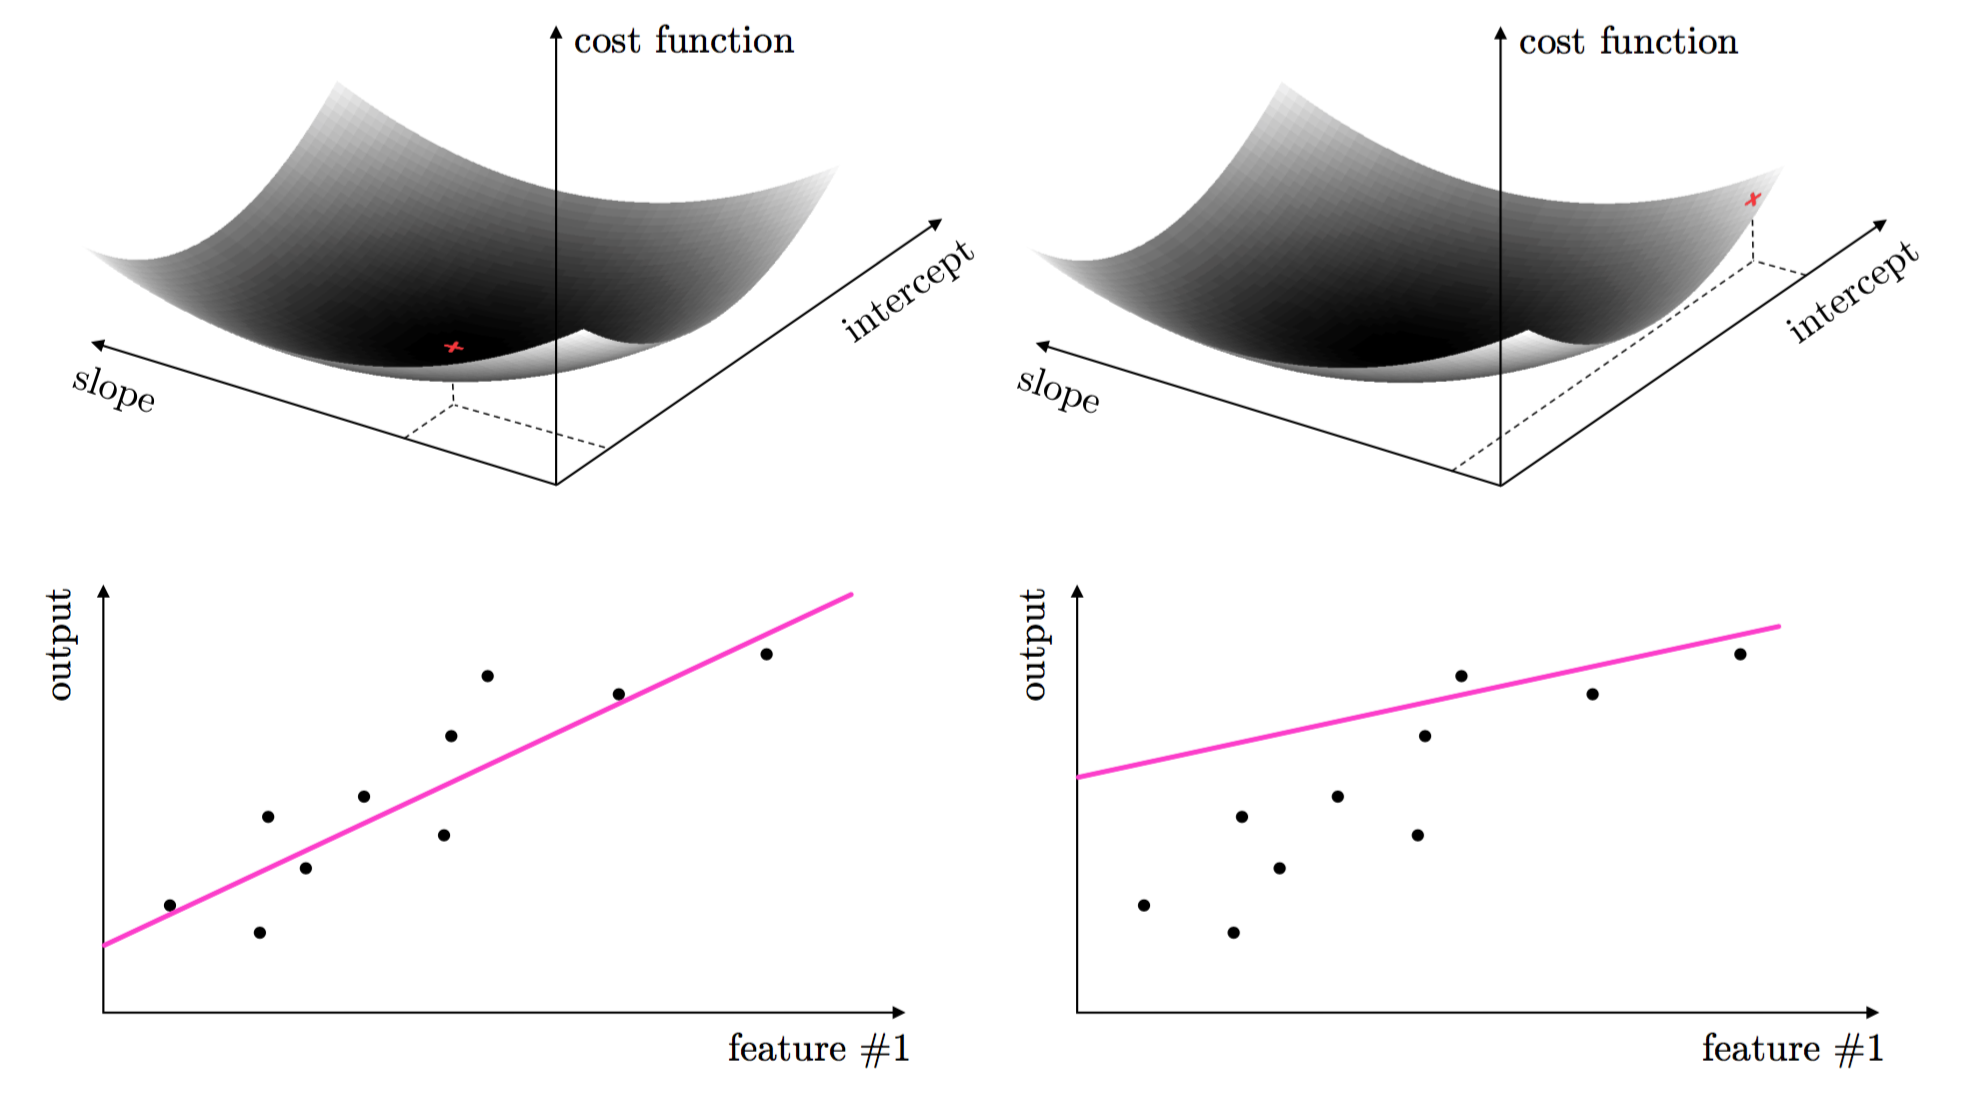

In [2]:
Image(image_path_1, width=800)

This same idea holds true for regression with higher dimensional input, as well as classification where we must properly tune parameters to *separate* classes of data.
Again, the parameters minimizing an associated cost function provide the best classification result. This is illustrated for classification below.

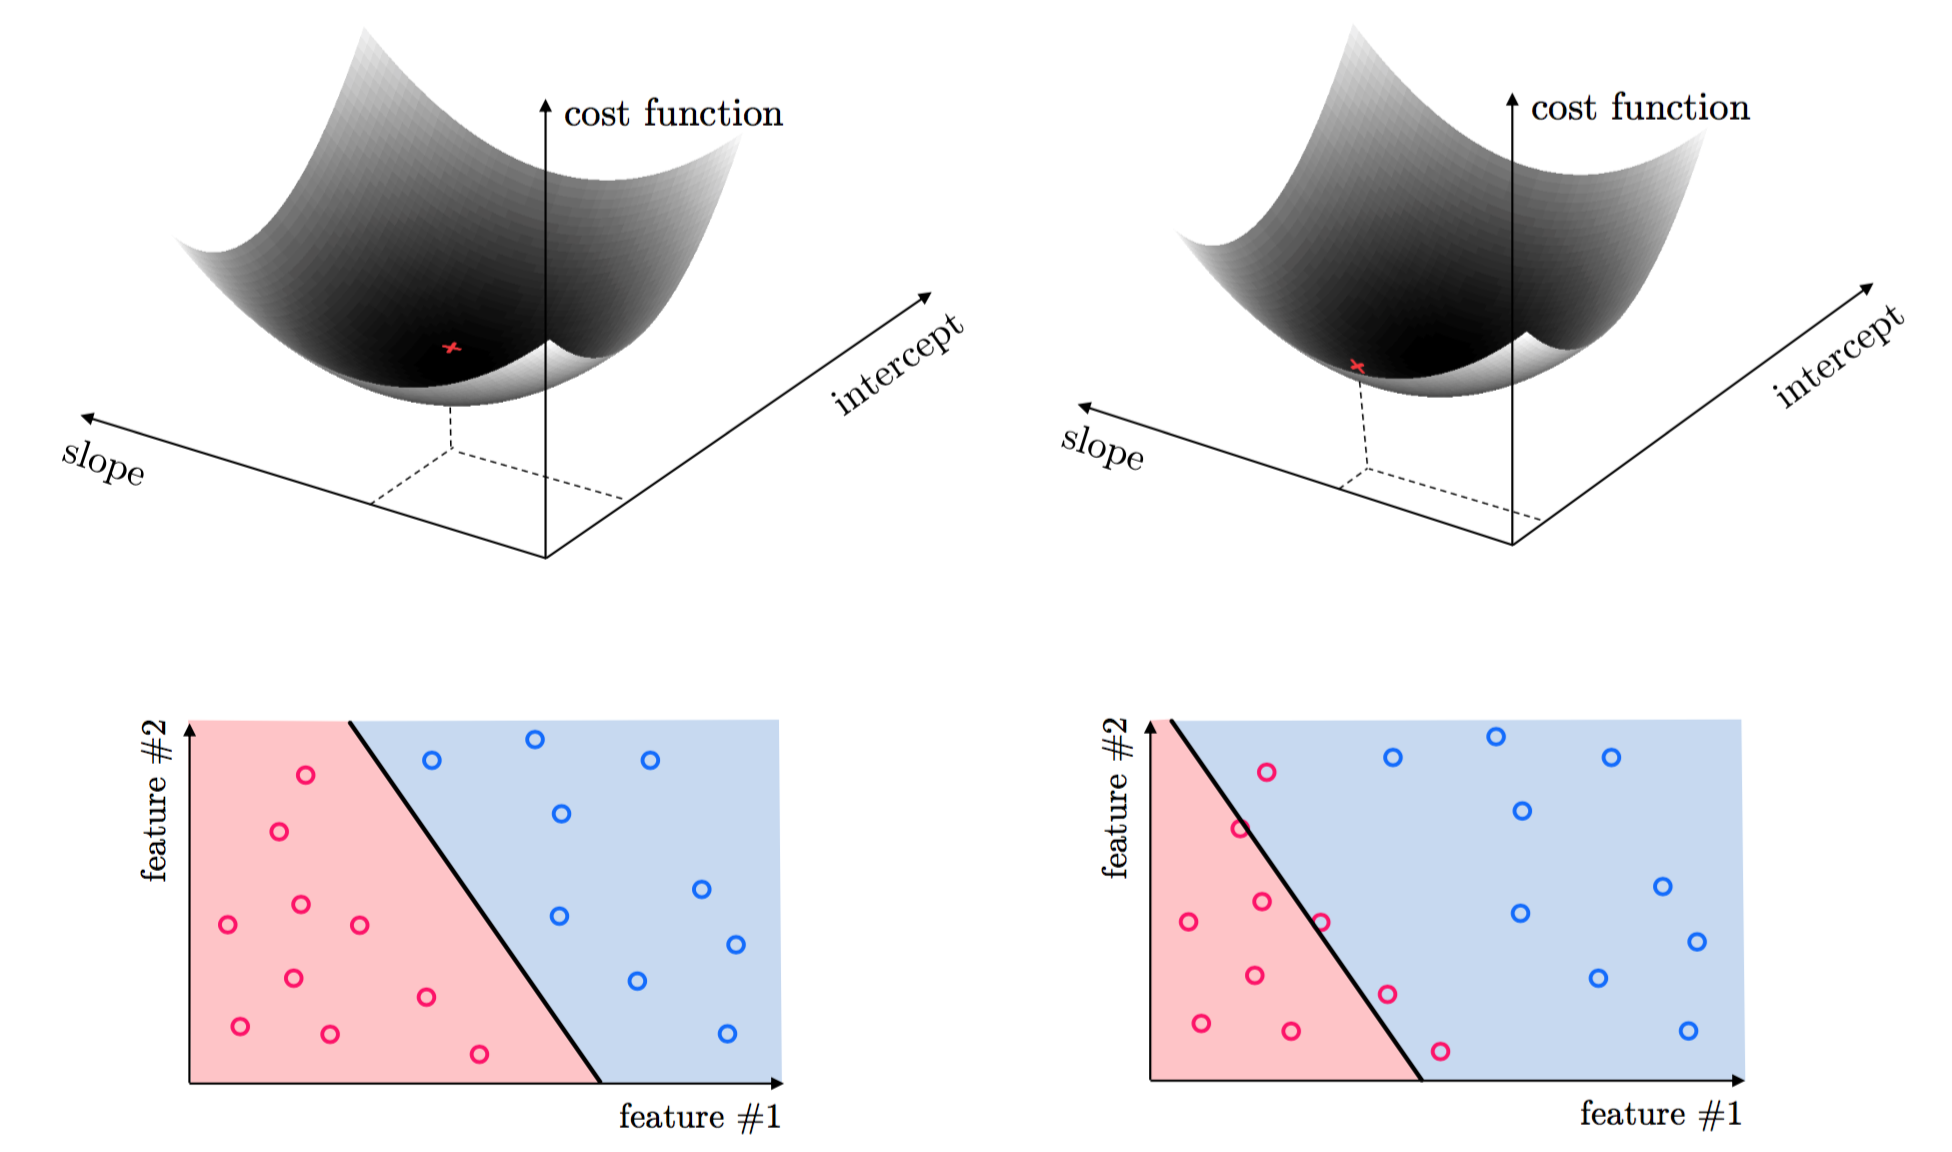

In [3]:
Image(image_path_2, width=800)

The tuning of these parameters require the *minimization of a cost function* can be formally written as follows.  For a generic function $g(\mathbf{w})$ taking in a general $N$ dimensional input $\mathbf{w}$ the problem of finding the particular point $\mathbf{v}$ where $g$ attains its smallest value is written formally as

\begin{equation}
\underset{\mathbf{w}}{\mbox{minimize}}\,\,\,\,g\left(\mathbf{w}\right)
\end{equation}

As detailed in our series on the *vital elements of calculus*, the first order optimality condition characterizes solutions to this problem.  However because these conditions can very rarely be solved 'by hand' we must rely on algorithmic techniques for finding function minima (or at the very least finding points close to them).  In this part of the text we examine many algorithmic methods of *mathematical optimization*, which aim to do just this.

> The tools of mathematical optimization are designed to minimize cost functions.  When applied to learning problems this corresponds to properly tuning the parameters of a learning model.  Mathematical optimization is the workhorse of machine learning / deep learning, playing a role in virtually every learning problem. 